In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#word processing packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import io

In [2]:
train = pd.read_csv("Quora_train.csv", encoding="utf-8")

In [3]:
test = pd.read_csv("Quora_test.csv", encoding="utf-8")

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56370 entries, 0 to 56369
Data columns (total 2 columns):
qid              56370 non-null object
question_text    56370 non-null object
dtypes: object(2)
memory usage: 880.9+ KB


In [5]:
test.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


In [6]:
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [7]:
train.tail()

,qid,question_text,target
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0
1306121,ffffed09fedb5088744a,Who wins in a battle between a Wolverine and a...,0


In [8]:
train.shape

(1306122, 3)

In [9]:
train.nunique()

qid              1306122
question_text    1306122
target                 2
dtype: int64

In [10]:
train.target.value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


## Independent v Dependent Variables

In [12]:
train_class = train[(train['target'] == 0) | (train['target'] == 1)]
train_class.shape

(1306122, 3)

In [13]:
# Creating a word count of text in new column w_freq
train['w_freq'] = train['question_text'].apply(lambda x: len(x.split()))
train.head()

,qid,question_text,target,w_freq
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15


In [14]:
# Creating a character count of text in new column c_freq
train['c_freq'] = train['question_text'].apply(len)
train.head()

,qid,question_text,target,w_freq,c_freq
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,72
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,81
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,67
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,57
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,77


In [15]:
train.corr()

,target,w_freq,c_freq
target,1.000000,0.162924,0.181331
w_freq,0.162924,1.000000,0.967391
c_freq,0.181331,0.967391,1.000000


In [16]:
target = train.groupby('target').mean()
target

,w_freq,c_freq
target,,
0,12.508533,68.872758
1,17.277812,98.064163


In [17]:
train.describe()

,target,w_freq,c_freq
count,1.306122e+06,1.306122e+06,1.306122e+06
mean,6.187018e-02,1.280361e+01,7.067884e+01
std,2.409197e-01,7.052437e+00,3.878428e+01
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,8.000000e+00,4.500000e+01
50%,0.000000e+00,1.100000e+01,6.000000e+01
75%,0.000000e+00,1.500000e+01,8.500000e+01
max,1.000000e+00,1.340000e+02,1.017000e+03


### Some Visualization

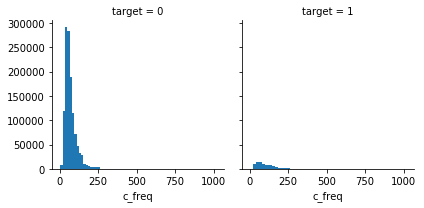

In [18]:
viz = sns.FacetGrid(data=train, col='target')
viz.map(plt.hist, 'c_freq', bins=50)

The histograms show a similar amount of characters used in both targets 0 and 1. Let's look at the same for words freq.

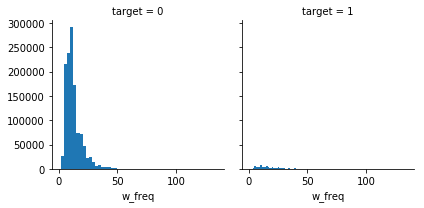

In [19]:
viz = sns.FacetGrid(data=train, col='target')
viz.map(plt.hist, 'w_freq', bins=50)

Results show that target 1 sentences have less words than target 0 sentences.

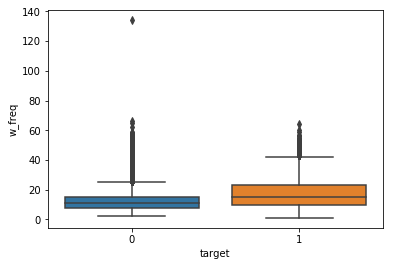

In [20]:
sns.boxplot(x='target', y='w_freq', data=train)

- It seems negative questions have much longer texts than positive ones (target = 0).
- There are some outliers, especially in the positive questions.

### Searching for sentences with limited amount of words.
I'm make the assumption that sentences with less or equal to 3 words are nonsensical and should be removed from the dataset.

In [21]:
train[(train['w_freq']<=3)].count()

qid              6308
question_text    6308
target           6308
w_freq           6308
c_freq           6308
dtype: int64

In [22]:
train[(train['w_freq']<=3)&train['target']==1]

,qid,question_text,target,w_freq,c_freq
6287,0137e3c896854685db8c,Are Mormons sexist?,1,3,19
7095,0160e552ea1863a5cb48,Does Quora exist?,1,3,17
9012,01c289c39d1554391b81,Are liberals evil?,1,3,18
12799,02853ab0793b89b60869,Are atheists scum?,1,3,18
15637,0311ea13d351a5280c96,Are Jewish evil?,1,3,16
30370,05eeea8bbaeb3095985a,Do Tennesseans burp?,1,3,20
34526,06c0bd5ebcb4c3919fec,Is Australia real?,1,3,18
46337,09128265f7791c64e361,Are psychopaths tools?,1,3,22
46684,092475ea783ef5623c98,Are Jews evil?,1,3,14
53453,0a7d871f0c425daeda5b,Are Jats mad?,1,3,13


In [23]:
train[(train['w_freq']<=3)&(train['target']==0)].count()

qid              6043
question_text    6043
target           6043
w_freq           6043
c_freq           6043
dtype: int64

In [24]:
train[(train['w_freq']<=3)&(train['target']==0)]

,qid,question_text,target,w_freq,c_freq
139,0006749b46d9fac9b6c7,What is osn?,0,3,12
663,001f1524e85e4eff58aa,What's your favourite?,0,3,22
819,00273ef277d580da66a1,Where's WeChat symbol?,0,3,22
1541,004d866f6267a36b26df,Are apparences futile?,0,3,22
1798,005995084cedbe640e42,Is borax toxic?,0,3,15
2018,006463c2d5774c178536,Is coffee overrated?,0,3,20
2062,00666baf876b2d04b1d7,What is NetWeaver?,0,3,18
2092,0067c17d8eef1ab8b9d0,What is ethene?,0,3,15
2446,007ac916c5c8c0024c67,What is muliebrity?,0,3,19
2523,007e828ea7de74c02616,What is loca?,0,3,13


While there's no information on how Kaggle created their model in the first place, one might wonder why questions such as 'Mohammad Shah Newaz?' or 'King Philip war?' or 'Bypass forbidden website?' could be ranked with a target value of 0.

Some questions with a target value of 1 can be ascerted as truly biased, however a question such as 'Are you cold?' could have easily been ranked with a value of 1.

I'm deciding to remove all questions where the word count is equal or less than 3.

In [25]:
train = train[~(train['w_freq']<=3)]

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299814 entries, 0 to 1306121
Data columns (total 5 columns):
qid              1299814 non-null object
question_text    1299814 non-null object
target           1299814 non-null int64
w_freq           1299814 non-null int64
c_freq           1299814 non-null int64
dtypes: int64(3), object(2)
memory usage: 59.5+ MB


## Text Pre Processing

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

In [28]:
train_sample = train.sample(frac=0.1).reset_index(drop=True)

In [29]:
train_sample.head()

,qid,question_text,target,w_freq,c_freq
0,fb826e42077ff4558d8c,How I will contract delivery man of clipart?,0,8,44
1,b036f540f6fb4b84fd02,What are the good and bad neighborhoods of Myt...,0,10,61
2,d64ca9e770790d061bd1,Would a US soldier from 1917 be stronger in a ...,0,18,86
3,0c2cb20c3fa0d9b5d9e4,Why does doing exercise help you reduce stress?,0,8,47
4,445b66fa49a3e0f0480f,How does Quora BNBR works?,0,5,26


In [30]:
X = train_sample['question_text']
y = train_sample['target']

In [31]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## Using CountVectorizer from SciKit

In [32]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [33]:
len(bow_transformer.vocabulary_)

76634

### Test of Vectorizer

In [34]:
train_sample.head()

,qid,question_text,target,w_freq,c_freq
0,fb826e42077ff4558d8c,How I will contract delivery man of clipart?,0,8,44
1,b036f540f6fb4b84fd02,What are the good and bad neighborhoods of Myt...,0,10,61
2,d64ca9e770790d061bd1,Would a US soldier from 1917 be stronger in a ...,0,18,86
3,0c2cb20c3fa0d9b5d9e4,Why does doing exercise help you reduce stress?,0,8,47
4,445b66fa49a3e0f0480f,How does Quora BNBR works?,0,5,26


In [35]:
question_0 = X[0]
question_0

'How I will contract delivery man of clipart?'

In [36]:
bow_0 = bow_transformer.transform([question_0])
print(bow_0)

  (0, 39310)	1
  (0, 40603)	1
  (0, 42408)	1
  (0, 55260)	1


In [37]:
print(bow_transformer.get_feature_names()[6699])
print(bow_transformer.get_feature_names()[15811])

Britain
Irelands


In [38]:
X = bow_transformer.transform(X)

In [39]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (129981, 76634)
Amount of Non-Zero occurrences:  828168
Density: 0.00831413509600579


## Training & Testing of dataset

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Testing

In [42]:
preds = nb.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[35588   996]
 [ 1553   858]]


             precision    recall  f1-score   support

          0       0.96      0.97      0.97     36584
          1       0.46      0.36      0.40      2411

avg / total       0.93      0.93      0.93     38995



### Saving Model with Pickle

In [66]:
import pickle

vectorizer = bow_transformer
filename = 'Final_Model.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

### Load and Re-use on Test Set

In [67]:
loaded_vectorizer = pickle.load(open(filename, 'rb'))

In [71]:
test_data_features = loaded_vectorizer.transform(test['question_text'])

In [77]:
print(test_data_features)

  (0, 11588)	1
  (0, 38804)	2
  (0, 48805)	1
  (0, 50137)	1
  (0, 63821)	2
  (0, 66083)	1
  (0, 72741)	1
  (0, 74335)	3
  (1, 5599)	1
  (1, 44452)	1
  (1, 57244)	1
  (1, 72652)	1
  (2, 1061)	1
  (2, 36143)	1
  (2, 53541)	1
  (2, 55063)	1
  (2, 61618)	1
  (3, 2741)	1
  (3, 32943)	1
  (3, 49615)	1
  (3, 50976)	1
  (3, 51427)	1
  (3, 54229)	1
  (3, 54404)	1
  (3, 54481)	1
  :	:
  (56366, 19383)	1
  (56366, 48841)	1
  (56366, 59171)	1
  (56366, 63832)	1
  (56366, 71125)	1
  (56367, 9297)	1
  (56367, 36192)	1
  (56367, 54404)	1
  (56367, 55184)	1
  (56367, 57190)	1
  (56367, 75426)	1
  (56368, 8762)	1
  (56368, 39492)	1
  (56368, 46406)	2
  (56368, 46445)	1
  (56368, 69186)	1
  (56368, 70530)	1
  (56368, 70810)	1
  (56368, 71378)	1
  (56368, 74839)	1
  (56369, 53552)	1
  (56369, 54093)	1
  (56369, 60661)	1
  (56369, 69685)	1
  (56369, 71023)	1
